In [22]:
from codes.python import load_DF_beats as DF
from codes.python import features_columns as col
from codes.python import TunedClassifier as classifier
import numpy as np
from codes.python import metric
from codes. python import post_process_features_ex as post_features
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix 
ls = []
ls.extend(['N', 'L', 'R'])                    # N
ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
ls2.extend(["['N']","['L']", "['R']"])                    # N
ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
ls2.extend(["['V']", "['E']"])                         # VEB
ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])

good_features_X = np.asarray(pd.read_csv("database/gooddata_X_train_no_outliers.csv").iloc[:,1:263])
good_features_y = np.asarray(pd.read_csv("database/gooddata_y_train_no_outliers.csv").iloc[:,1])

rank = pd.read_csv("database/features_ranking.py")


rank_n_f = pd.read_csv("database/features_n_vs_f_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_n_s = pd.read_csv("database/features_n_vs_s_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_n_v = pd.read_csv("database/features_n_vs_v_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_s_f = pd.read_csv("database/features_s_vs_f_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_s_v = pd.read_csv("database/features_s_vs_v_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])
rank_v_f = pd.read_csv("database/features_v_vs_f_randomforest.py").sort_values(['rfscore', 'features'], ascending=[0,1])

In [23]:
np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )

np_clinic_1, np_clinic_2,np_non_var_1, np_non_var_2, np_class_ID_1, np_class_ID_2 = DF.get_all_dataframe_patient_specific(200,patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )

done norm
row 0 done
done norm
row 1 done


In [ ]:
score = 0.0075
feature_good = rank[rank['rfscore'] >= score]['features'].values

score = 0.01
score_n_s = 0.01
score_n_f = 0.01
score_n_v = 0.01
score_s_f = 0.01
score_s_v = 0.015
score_v_f = 0.01
feature_good = rank[rank['rfscore'] >= score]['features'].values
n_s = rank_n_s[rank_n_s['rfscore'] >= score_n_s]['features'].values
n_f = rank_n_f[rank_n_f['rfscore'] >= score_n_f]['features'].values
n_v = rank_n_v[rank_n_v['rfscore'] >= score_n_v]['features'].values
s_f = rank_s_f[rank_s_f['rfscore'] >= score_s_f]['features'].values
s_v = rank_s_v[rank_s_v['rfscore'] >= score_s_v]['features'].values
v_f = rank_v_f[rank_v_f['rfscore'] >= score_v_f]['features'].values

In [24]:
X_train = np_clinic_1
X_test = np_clinic_2
y_train = np_class_ID_1
y_test = np_class_ID_2
input_size=X_train.shape[1]

In [32]:
np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

In [38]:
import pickle

In [59]:
f = open('database/nvs_log.text', 'wb')
pickle.dump([feature_selector.subsets_,feat], f)
f.close()



In [60]:
f = open('database/nvs_log.text', 'rb')
obj = pickle.load(f)
f.close()

NameError: name 'nvs' is not defined

In [5]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

ada=RandomUnderSampler(ratio='not minority')
train, train_labels=ada.fit_sample(X_train, y_train)
test, test_labels=ada.fit_sample(X_test, y_test)

X_train = train
#X_test = test
y_train = train_labels
#y_test = test_labels
input_size=X_train.shape[1]

ModuleNotFoundError: No module named 'imblearn'

In [34]:
features_clinic,c_ID,f_M, f_V, f_d , norm_mlii, norm_v1 , norm_dtw = col.get_columns()
X_train_balanced = pd.DataFrame(good_features_X,columns=features_clinic)
X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)


In [26]:
good_features_y[good_features_y== 0] = 0
good_features_y[good_features_y != 0] = 1
y_test[y_test == 0] = 0
y_test[y_test != 0] = 1

In [ ]:
#Linear_D(X_train, y_train, X_test, y_test, labels = [0,1,2,3])

ls = []
ls.extend(['N', 'L', 'R'])                    # N
#ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
#ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
ls2.extend(["['N']","['L']", "['R']"])                    # N
#ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
ls2.extend(["['V']", "['E']"])                         # VEB
#ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])


np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )


np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=10, 
                            class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='auto',
                            verbose=0, warm_start=False, n_jobs=None)

feature_selector = SequentialFeatureSelector(lr,
           k_features=20,
           forward=True,
           floating = True,
           verbose=2,
           scoring='f1',
           cv=4)


y_train[y_train==0] = 0
y_train[y_train!=0] = 1

features = feature_selector.fit(X_train, y_train.ravel())

feat = list(feature_selector.k_feature_names_)

f = open('database/nvv_log.text', 'wb')
pickle.dump([feature_selector.subsets_,feat], f)
f.close()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
C:\Users\Larry Lewis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Larry Lewis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done 262 out of 262 | elapsed:   51.3s finished

[2019-08-16 19:53:27] Features: 1/20 -- score: 0.5743219245024265[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 261 out of 261 | elapsed:   55.6s finished
[Paral

In [ ]:
#Linear_D(X_train, y_train, X_test, y_test, labels = [0,1,2,3])

ls = []
ls.extend(['N', 'L', 'R'])                    # N
#ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
#ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
ls2.extend(["['N']","['L']", "['R']"])                    # N
#ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
#ls2.extend(["['V']", "['E']"])                         # VEB
ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])


np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )


np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=10, 
                            class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='auto',
                            verbose=0, warm_start=False, n_jobs=None)

feature_selector = SequentialFeatureSelector(lr,
           k_features=20,
           forward=True,
           floating = True,
           verbose=2,
           scoring='f1',
           cv=4)


y_train[y_train==0] = 0
y_train[y_train!=0] = 1

features = feature_selector.fit(X_train, y_train.ravel())

feat = list(feature_selector.k_feature_names_)

f = open('database/nvf_log.text', 'wb')
pickle.dump([feature_selector.subsets_,feat], f)
f.close()

In [ ]:
#Linear_D(X_train, y_train, X_test, y_test, labels = [0,1,2,3])

ls = []
ls.extend(['N', 'L', 'R'])                    # N
#ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
#ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
ls2.extend(["['N']","['L']", "['R']"])                    # N
#ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
#ls2.extend(["['V']", "['E']"])                         # VEB
ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])


np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )


np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=10, 
                            class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='auto',
                            verbose=0, warm_start=False, n_jobs=None)

feature_selector = SequentialFeatureSelector(lr,
           k_features=20,
           forward=True,
           floating = True,
           verbose=2,
           scoring='f1',
           cv=4)


y_train[y_train==0] = 0
y_train[y_train!=0] = 1

features = feature_selector.fit(X_train, y_train.ravel())

feat = list(feature_selector.k_feature_names_)

f = open('database/nvf_log.text', 'wb')
pickle.dump([feature_selector.subsets_,feat], f)
f.close()

In [ ]:
#Linear_D(X_train, y_train, X_test, y_test, labels = [0,1,2,3])

ls = []
#ls.extend(['N', 'L', 'R'])                    # N
ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
#ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
#ls2.extend(["['N']","['L']", "['R']"])                    # N
ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
ls2.extend(["['V']", "['E']"])                         # VEB
#ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])


np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )


np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=10, 
                            class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='auto',
                            verbose=0, warm_start=False, n_jobs=None)

feature_selector = SequentialFeatureSelector(lr,
           k_features=20,
           forward=True,
           floating = True,
           verbose=2,
           scoring='f1',
           cv=4)


y_train[y_train==1] = 0
y_train[y_train!=0] = 1

features = feature_selector.fit(X_train, y_train.ravel())

feat = list(feature_selector.k_feature_names_)

f = open('database/svv_log.text', 'wb')
pickle.dump([feature_selector.subsets_,feat], f)
f.close()


In [ ]:
ls = []
#ls.extend(['N', 'L', 'R'])                    # N
ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
#ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
#ls2.extend(["['N']","['L']", "['R']"])                    # N
ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
#ls2.extend(["['V']", "['E']"])                         # VEB
ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])


np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )


np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=10, 
                            class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='auto',
                            verbose=0, warm_start=False, n_jobs=None)

feature_selector = SequentialFeatureSelector(lr,
           k_features=20,
           forward=True,
           floating = True,
           verbose=2,
           scoring='f1',
           cv=4)


y_train[y_train==1] = 0
y_train[y_train!=0] = 1

features = feature_selector.fit(X_train, y_train.ravel())

feat = list(feature_selector.k_feature_names_)

f = open('database/svf_log.text', 'wb')
pickle.dump([feature_selector.subsets_,feat], f)
f.close()

In [ ]:
ls = []
#ls.extend(['N', 'L', 'R'])                    # N
#ls.extend(['A', 'a', 'J', 'S', 'e', 'j'])     # SVEB 
ls.extend(['V', 'E'])                         # VEB
ls.extend(['F'])
#ls.extend([ 'P', '/', 'f', 'u'])
patient_l_1 = [101]
#patient_l_2 = [100]
patient_ls_1 = [101,106,108,109,112,114,115,116,118,119,122,124,201,203,205,207,208,209,215,220,223,230]
patient_ls_2 = [100,103,105,111,113,117,121,123,200,202,210,212,213,214,219,221,222,228,231,232,233,234]


ls2 = []
#ls2.extend(["['N']","['L']", "['R']"])                    # N
#ls2.extend(["['A']", "['a']", "['J']", "['S']",  "['e']", "['j']"])     # SVEB 
ls2.extend(["['V']", "['E']"])                         # VEB
ls2.extend(["['F']"])
#ls.extend([ "['P']","[ '/']"," ['f']", "['u']"])


np_clinic_1_old, np_clinic_2_old,np_non_var_1_old, np_non_var_2_old, np_class_ID_1_old, np_class_ID_2_old, patients_ls_1, patients_ls_2, DB1, DB2, DB1_V1, DB2_V1, DB1_non_cli, DB2_non_cli, DB1_dwt, DB2_dwt, DB1_dwt_V1, DB2_dwt_V1 = DF.get_all_dataframe(patient_l_1=patient_ls_1,patient_l_2=patient_ls_2 , ls=ls, ls2=ls2 )


np_class_ID_1_old = [int(i) for i in np_class_ID_1_old]
np_class_ID_2_old = [int(i) for i in np_class_ID_2_old]
X_train = np_clinic_1_old
X_test = np_clinic_2_old
y_train = np.asarray(np_class_ID_1_old)
y_test = np.asarray(np_class_ID_2_old)
input_size=X_train.shape[1]

X_train = pd.DataFrame(X_train,columns=features_clinic)
X_test = pd.DataFrame(X_test,columns=features_clinic)

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( penalty='l2', dual=False, tol=0.0001, C=100, fit_intercept=True, intercept_scaling=10, 
                            class_weight='balanced', random_state=None, solver='liblinear', max_iter=100, multi_class='auto',
                            verbose=0, warm_start=False, n_jobs=None)

feature_selector = SequentialFeatureSelector(lr,
           k_features=20,
           forward=True,
           floating = True,
           verbose=2,
           scoring='f1',
           cv=4)


y_train[y_train==2] = 0
y_train[y_train!=0] = 1

features = feature_selector.fit(X_train, y_train.ravel())

feat = list(feature_selector.k_feature_names_)

f = open('database/vvf_log.text', 'wb')
pickle.dump([feature_selector.subsets_,feat], f)
f.close()

In [82]:

label_color_dict = {'N':0,'S':1,'V':2, 'F':3}


train_labels = np.asarray([label_color_dict[id] for id in train_labels])
test_labels = np.asarray([label_color_dict[id] for id in test_labels])

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[42176   758   128   958]
 [ 1416   256   311    66]
 [  113   242  2749   116]
 [  361     0    21     6]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     44020
           1       0.20      0.12      0.15      2049
           2       0.86      0.85      0.86      3220
           3       0.01      0.02      0.01       388

   micro avg       0.91      0.91      0.91     49677
   macro avg       0.51      0.49      0.49     49677
weighted avg       0.91      0.91      0.91     49677

[0.5666142044154975, 2.0391405217361385, 0.538199667424766]
[[43237   315   180   288]
 [ 1708   100   231    10]
 [  734    99  2281   106]
 [  376     0     8     4]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     44020
           1       0.19      0.05      0.08      2049
           2       0.84      0.71      0.77      3220
           3       0.01      0.01      0.01       388

   micro avg   

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[42211     0  1809     0]
 [ 1980     0    69     0]
 [ 3191     0    29     0]
 [  383     0     5     0]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     44020
           1       0.00      0.00      0.00      2049
           2       0.02      0.01      0.01      3220
           3       0.00      0.00      0.00       388

   micro avg       0.85      0.85      0.85     49677
   macro avg       0.22      0.24      0.23     49677
weighted avg       0.78      0.85      0.82     49677



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[41881     0  2139     0]
 [ 1980     0    69     0]
 [ 3206     0    14     0]
 [  385     0     3     0]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     44020
           1       0.00      0.00      0.00      2049
           2       0.01      0.00      0.01      3220
           3       0.00      0.00      0.00       388

   micro avg       0.84      0.84      0.84     49677
   macro avg       0.22      0.24      0.23     49677
weighted avg       0.78      0.84      0.81     49677



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[42079     0  1941     0]
 [ 1980     0    69     0]
 [ 3198     0    22     0]
 [  385     0     3     0]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     44020
           1       0.00      0.00      0.00      2049
           2       0.01      0.01      0.01      3220
           3       0.00      0.00      0.00       388

   micro avg       0.85      0.85      0.85     49677
   macro avg       0.22      0.24      0.23     49677
weighted avg       0.78      0.85      0.81     49677



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


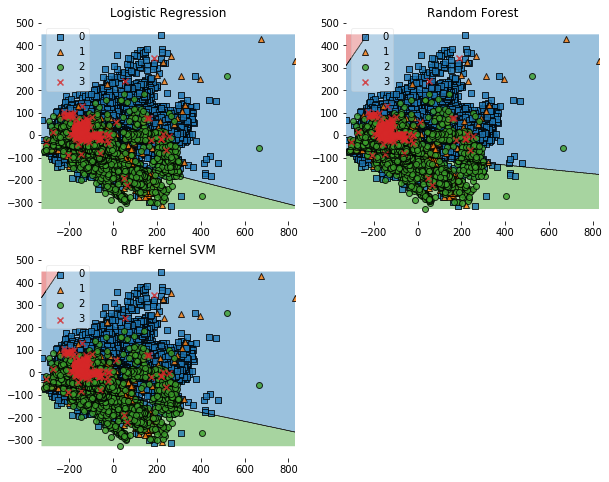

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions



logisticRegress(train, train_labels, test, test_labels, labels=[0,1,2,3])
Linear_D(train, train_labels, test, test_labels, labels=[0,1,2,3])
# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = LinearDiscriminantAnalysis()
#clf2 = RandomForestClassifier(random_state=0)
#clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2],
                              weights=[1, 1], voting='soft')

# Loading some example data
X = train
y = np.asarray(train_labels)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents_test = pca.fit_transform(test)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, eclf],# clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(principalComponents, y)
    
    
    predict = clf.predict(principalComponents_test)
    #scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
    #scores.mean()                             

    print(confusion_matrix(test_labels,predict))  
    print(classification_report(test_labels,predict))
    #print(metric.get_metrics(predict.ravel(),test_labels, lb = [0,1,2,3]))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=principalComponents, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [31]:
train.shape

(50984, 22)

In [4]:
train_labels

array(['F', 'F', 'F', ..., 'V', 'V', 'V'], dtype='<U1')

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[42660  1039   279    43]
 [  743  1259    30    18]
 [  682   603  1712   223]
 [  245     1     3   139]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     44021
           1       0.43      0.61      0.51      2050
           2       0.85      0.53      0.65      3220
           3       0.33      0.36      0.34       388

   micro avg       0.92      0.92      0.92     49679
   macro avg       0.64      0.62      0.62     49679
weighted avg       0.93      0.92      0.92     49679

[0.6146321009013608, 2.4255118943775247, 0.610505037247871]


C:\Users\chont\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[43226   288   328   179]
 [ 1930    84    36     0]
 [ 1331   775   928   186]
 [  119     0    12   257]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     44021
           1       0.07      0.04      0.05      2050
           2       0.71      0.29      0.41      3220
           3       0.41      0.66      0.51       388

   micro avg       0.90      0.90      0.90     49679
   macro avg       0.53      0.49      0.48     49679
weighted avg       0.87      0.90      0.88     49679

[0.37120218124845267, 1.1140653340852922, 0.32485925738488786]


C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[43023     0   998     0]
 [ 1850     0   200     0]
 [ 1347     0  1873     0]
 [  329     0    59     0]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     44021
           1       0.00      0.00      0.00      2050
           2       0.60      0.58      0.59      3220
           3       0.00      0.00      0.00       388

   micro avg       0.90      0.90      0.90     49679
   macro avg       0.38      0.39      0.38     49679
weighted avg       0.86      0.90      0.88     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[43873     0   148     0]
 [ 2041     0     9     0]
 [ 2582     0   638     0]
 [  366     0    22     0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     44021
           1       0.00      0.00      0.00      2050
           2       0.78      0.20      0.32      3220
           3       0.00      0.00      0.00       388

   micro avg       0.90      0.90      0.90     49679
   macro avg       0.42      0.30      0.32     49679
weighted avg       0.85      0.90      0.86     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[43505     0   516     0]
 [ 1929     0   121     0]
 [ 1706     0  1514     0]
 [  332     0    56     0]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44021
           1       0.00      0.00      0.00      2050
           2       0.69      0.47      0.56      3220
           3       0.00      0.00      0.00       388

   micro avg       0.91      0.91      0.91     49679
   macro avg       0.40      0.36      0.38     49679
weighted avg       0.86      0.91      0.88     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


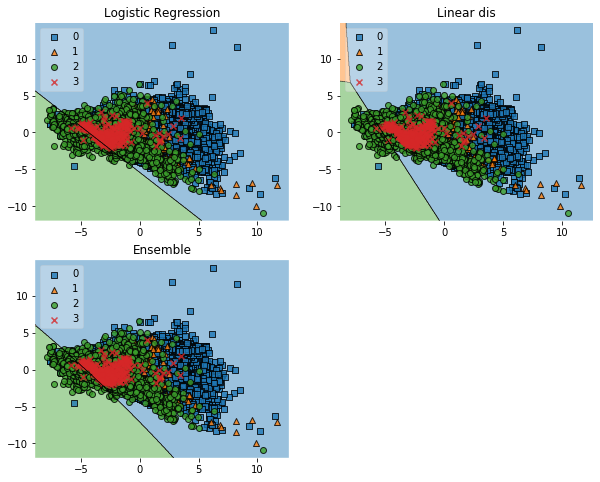

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions




# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
#clf2 = RandomForestClassifier(random_state=0)
#clf3 = SVC(random_state=0, probability=True)
#eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                             # weights=[2, 1, 1], voting='soft')
    
clf2 = LinearDiscriminantAnalysis()
#clf2 = RandomForestClassifier(random_state=0)
#clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2],
                              weights=[1, 1], voting='soft')

# Loading some example data
X = X_train[n_s]
y = y_train

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X_te_n_s = StandardScaler().fit_transform(X_test[n_s])

logisticRegress(X, y_train, X_te_n_s, y_test, labels=[0,1,2,3])
Linear_D(X, y_train, X_te_n_s, y_test, labels=[0,1,2,3])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents_test = pca.fit_transform(X_te_n_s)

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Linear dis',
          'Ensemble',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, eclf], #clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(principalComponents, y)
    
    predict = clf.predict(principalComponents_test)
    #scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
    #scores.mean()                             

    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))
    #print(metric.get_metrics(predict.ravel(),y_test.ravel(), lb = [0,1,2,3]))
    
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=principalComponents, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[40182  1601  2118   120]
 [ 1409   492   131    18]
 [  419   122  2512   167]
 [  314     1    38    35]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93     44021
           1       0.22      0.24      0.23      2050
           2       0.52      0.78      0.63      3220
           3       0.10      0.09      0.10       388

   micro avg       0.87      0.87      0.87     49679
   macro avg       0.45      0.51      0.47     49679
weighted avg       0.89      0.87      0.88     49679

[0.4513252652904408, 1.7655882680822685, 0.446361166155504]


C:\Users\chont\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[38499  1226  1730  2566]
 [ 1509   412   107    22]
 [  259   198  2163   600]
 [  209     5     9   165]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     44021
           1       0.22      0.20      0.21      2050
           2       0.54      0.67      0.60      3220
           3       0.05      0.43      0.09       388

   micro avg       0.83      0.83      0.83     49679
   macro avg       0.44      0.54      0.45     49679
weighted avg       0.89      0.83      0.86     49679

[0.3725306176825746, 1.63604220179987, 0.3907705840662711]


C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[44017     0     1     3]
 [ 2050     0     0     0]
 [ 3199     0    21     0]
 [  388     0     0     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44021
           1       0.00      0.00      0.00      2050
           2       0.95      0.01      0.01      3220
           3       0.00      0.00      0.00       388

   micro avg       0.89      0.89      0.89     49679
   macro avg       0.46      0.25      0.24     49679
weighted avg       0.85      0.89      0.83     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[44010     0    11     0]
 [ 2050     0     0     0]
 [ 3132     0    88     0]
 [  351     0    37     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44021
           1       0.00      0.00      0.00      2050
           2       0.65      0.03      0.05      3220
           3       0.00      0.00      0.00       388

   micro avg       0.89      0.89      0.89     49679
   macro avg       0.38      0.26      0.25     49679
weighted avg       0.83      0.89      0.84     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[44019     0     2     0]
 [ 2050     0     0     0]
 [ 3194     0    26     0]
 [  388     0     0     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44021
           1       0.00      0.00      0.00      2050
           2       0.93      0.01      0.02      3220
           3       0.00      0.00      0.00       388

   micro avg       0.89      0.89      0.89     49679
   macro avg       0.45      0.25      0.24     49679
weighted avg       0.85      0.89      0.83     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


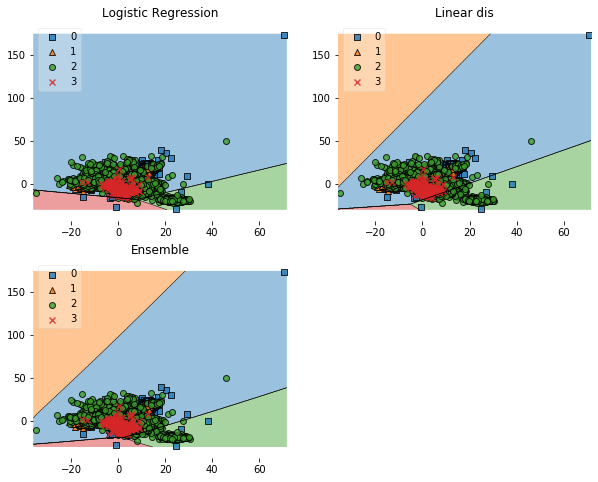

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions




# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
#clf2 = RandomForestClassifier(random_state=0)
#clf3 = SVC(random_state=0, probability=True)
#eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                             # weights=[2, 1, 1], voting='soft')
    
clf2 = LinearDiscriminantAnalysis()
#clf2 = RandomForestClassifier(random_state=0)
#clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2],
                              weights=[1, 1], voting='soft')


# Loading some example data
X = X_train
y = y_train


from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X_te_n_s = StandardScaler().fit_transform(X_test)

logisticRegress(X, y, X_te_n_s, y_test, labels=[0,1,2,3])
Linear_D(X, y, X_te_n_s, y_test, labels=[0,1,2,3])

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents_test = pca.fit_transform(X_te_n_s)


# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Linear dis',
          'Ensemble',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, eclf], #clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(principalComponents, y)
    
    predict = clf.predict(principalComponents_test)
    #scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
    #scores.mean()                             

    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))
    #print(metric.get_metrics(predict.ravel(),y_test.ravel(), lb = [0,1,2,3]))
    
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=principalComponents, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[13429 15886  9685  5021]
 [  792   741   317   200]
 [  131   424  1950   715]
 [    7     9   358    14]]
              precision    recall  f1-score   support

           0       0.94      0.31      0.46     44021
           1       0.04      0.36      0.08      2050
           2       0.16      0.61      0.25      3220
           3       0.00      0.04      0.00       388

   micro avg       0.32      0.32      0.32     49679
   macro avg       0.28      0.33      0.20     49679
weighted avg       0.84      0.32      0.43     49679

[0.05258919779440027, 1.1688962108054097, 0.17240662524787637]


C:\Users\chont\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[[ 9265 15855  7550 11351]
 [  539   566   466   479]
 [  116   146  1336  1622]
 [    5    90   195    98]]
              precision    recall  f1-score   support

           0       0.93      0.21      0.34     44021
           1       0.03      0.28      0.06      2050
           2       0.14      0.41      0.21      3220
           3       0.01      0.25      0.01       388

   micro avg       0.23      0.23      0.23     49679
   macro avg       0.28      0.29      0.16     49679
weighted avg       0.84      0.23      0.32     49679

[0.0268135067780186, 0.8649233494358075, 0.12152217206848524]


C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[44021     0     0     0]
 [ 2050     0     0     0]
 [ 3220     0     0     0]
 [  388     0     0     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44021
           1       0.00      0.00      0.00      2050
           2       0.00      0.00      0.00      3220
           3       0.00      0.00      0.00       388

   micro avg       0.89      0.89      0.89     49679
   macro avg       0.22      0.25      0.23     49679
weighted avg       0.79      0.89      0.83     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[[44021     0     0     0]
 [ 2050     0     0     0]
 [ 3220     0     0     0]
 [  388     0     0     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44021
           1       0.00      0.00      0.00      2050
           2       0.00      0.00      0.00      3220
           3       0.00      0.00      0.00       388

   micro avg       0.89      0.89      0.89     49679
   macro avg       0.22      0.25      0.23     49679
weighted avg       0.79      0.89      0.83     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[44021     0     0     0]
 [ 2050     0     0     0]
 [ 3220     0     0     0]
 [  388     0     0     0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     44021
           1       0.00      0.00      0.00      2050
           2       0.00      0.00      0.00      3220
           3       0.00      0.00      0.00       388

   micro avg       0.89      0.89      0.89     49679
   macro avg       0.22      0.25      0.23     49679
weighted avg       0.79      0.89      0.83     49679



C:\Users\chont\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


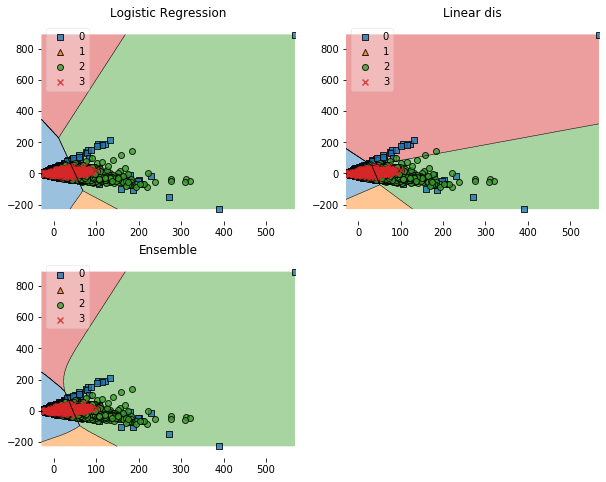

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions




# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
#clf2 = RandomForestClassifier(random_state=0)
#clf3 = SVC(random_state=0, probability=True)
#eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                             # weights=[2, 1, 1], voting='soft')
    
clf2 = LinearDiscriminantAnalysis()
#clf2 = RandomForestClassifier(random_state=0)
#clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2],
                              weights=[1, 1], voting='soft')


# Loading some example data
X = X_train
y = y_train


X_te_ns = X_test

logisticRegress(X, y, X_te_n_s, y_test, labels=[0,1,2,3])
Linear_D(X, y, X_te_n_s, y_test, labels=[0,1,2,3])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalComponents_test = pca.fit_transform(X_te_n_s)


# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Linear dis',
          'Ensemble',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, eclf], #clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(principalComponents, y)
    
    predict = clf.predict(principalComponents_test)
    #scores = cross_val_score(X_train, y_train.data, iris.target, cv=10)
    #scores.mean()                             

    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))
    #print(metric.get_metrics(predict.ravel(),y_test.ravel(), lb = [0,1,2,3]))
    
    
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=principalComponents, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [105]:
X = good_features_X
y = good_features_y


from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X_te_n_s = StandardScaler().fit_transform(X_test)

randomForest(X,y, X_te_n_s, y_test )
logisticRegress(X,y, X_te_n_s, y_test)

[[18537  8524  8308  8652]
 [  181  1615   237    17]
 [    7   168  2950    95]
 [    2     9   112   265]]
              precision    recall  f1-score   support

           0       0.99      0.42      0.59     44021
           1       0.16      0.79      0.26      2050
           2       0.25      0.92      0.40      3220
           3       0.03      0.68      0.06       388

   micro avg       0.47      0.47      0.47     49679
   macro avg       0.36      0.70      0.33     49679
weighted avg       0.90      0.47      0.56     49679

[0.17352238018996433, 2.1146638481027207, 0.35109417110782226]


C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[14538 14690  6842  7951]
 [   74  1484   397    95]
 [   21   264  2795   140]
 [   10     6   121   251]]
              precision    recall  f1-score   support

           0       0.99      0.33      0.50     44021
           1       0.09      0.72      0.16      2050
           2       0.28      0.87      0.42      3220
           3       0.03      0.65      0.06       388

   micro avg       0.38      0.38      0.38     49679
   macro avg       0.35      0.64      0.28     49679
weighted avg       0.90      0.38      0.47     49679

[0.13285856487378755, 1.957394418638831, 0.31110358476674765]


(LogisticRegression(C=100, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=10, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 array([1, 1, 1, ..., 0, 0, 3], dtype=int64),
 0.31110358476674765)

In [102]:
randomForest(good_features_X,good_features_y, X_test, y_test )

[[35617  2363  1499  4542]
 [ 1507   366   170     7]
 [   74    99  2926   121]
 [   12     3    46   327]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     44021
           1       0.13      0.18      0.15      2050
           2       0.63      0.91      0.74      3220
           3       0.07      0.84      0.12       388

   micro avg       0.79      0.79      0.79     49679
   macro avg       0.45      0.68      0.47     49679
weighted avg       0.89      0.79      0.83     49679

[0.3573629808103967, 1.8469827480746601, 0.4095543339145309]


(RandomForestClassifier(bootstrap=True, class_weight='balanced',
             criterion='gini', max_depth=16, max_features=50,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0001,
             n_estimators=1000, n_jobs=None, oob_score=False,
             random_state=None, verbose=0, warm_start=False),
 array([2, 0, 0, ..., 0, 0, 3], dtype=int64),
 0.4095543339145309)

In [101]:
svm_model_linear(X,y, X_te_n_s, y_test)

[[14516 11741  5939 11825]
 [  346  1234   414    56]
 [  114   158  2850    98]
 [   11     6    76   295]]
              precision    recall  f1-score   support

           0       0.97      0.33      0.49     44021
           1       0.09      0.60      0.16      2050
           2       0.31      0.89      0.46      3220
           3       0.02      0.76      0.05       388

   micro avg       0.38      0.38      0.38     49679
   macro avg       0.35      0.64      0.29     49679
weighted avg       0.88      0.38      0.47     49679

[0.12444509274310508, 1.8881084212127908, 0.2982360990231514]


(SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=True, random_state=None, shrinking=True,
   tol=0.1, verbose=False),
 array([2, 1, 1, ..., 0, 0, 0], dtype=int64),
 0.2982360990231514)

In [103]:
svm_model_linear(good_features_X,good_features_y, X_test, y_test )

[[34392  1708   641  7280]
 [ 1195   646    69   140]
 [  159   220  2578   263]
 [   26     2    34   326]]
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     44021
           1       0.25      0.32      0.28      2050
           2       0.78      0.80      0.79      3220
           3       0.04      0.84      0.08       388

   micro avg       0.76      0.76      0.76     49679
   macro avg       0.51      0.68      0.50     49679
weighted avg       0.91      0.76      0.83     49679

[0.33300927466378955, 2.142557997752881, 0.43432438705100485]


(SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovo', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=True, random_state=None, shrinking=True,
   tol=0.1, verbose=False),
 array([2, 0, 0, ..., 0, 0, 0], dtype=int64),
 0.43432438705100485)

In [104]:
logisticRegress(good_features_X,good_features_y, X_test, y_test )

C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chont\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[[30474  2891  4774  5882]
 [ 1080   693   151   126]
 [   61   230  2669   260]
 [   22     4    45   317]]
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     44021
           1       0.18      0.34      0.24      2050
           2       0.35      0.83      0.49      3220
           3       0.05      0.82      0.09       388

   micro avg       0.69      0.69      0.69     49679
   macro avg       0.39      0.67      0.41     49679
weighted avg       0.88      0.69      0.76     49679

[0.25858596662837396, 1.6978306929155305, 0.3415218199286283]


(LogisticRegression(C=100, class_weight='balanced', dual=False,
           fit_intercept=True, intercept_scaling=10, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
           solver='warn', tol=0.0001, verbose=0, warm_start=False),
 array([2, 0, 2, ..., 0, 0, 0], dtype=int64),
 0.3415218199286283)